In [1]:
from pathlib import Path
import json
import xgi
import matplotlib.pyplot as plt

In [2]:

def read_jsonl(fname):
    out=[]
    with open(fname, 'r') as file:
        # Read each line in the file
        for line in file:
            # Parse the JSON string and add the resulting dictionary to the list
            out.append(json.loads(line))
    return out

def flatten(l):
    return [item for sublist in l for item in sublist]



In [3]:
dir_author = Path(".cache_author/")
fnames = list(dir_author.glob("*"))

PI_fnames = [fname for fname in fnames if fname.stem.split("_")[0] == "A5070493763"]
PI_fnames = sorted(PI_fnames, key=lambda p: int(str(p).split('_')[-1].split('.')[0]))

In [4]:
def get_coauths_dict(fnames):
    all_coauths = []
    for fname in fnames:
        dat=read_jsonl(fname)
        authors=flatten([_['authorships'] for _ in dat])
        all_coauths += list(set([_['author']['display_name'] for _ in authors]))
    return {a: i for i,a in enumerate(set(all_coauths))}

name2idx = get_coauths_dict(PI_fnames)
idx2name = {v:k for k,v in name2idx.items()}

In [5]:
work = read_jsonl(PI_fnames[30]) # 2012
print(len(work))

7


In [6]:
authors = work[0]['authorships']
authors

[{'author_position': 'first',
  'author': {'id': 'https://openalex.org/A5024844339',
   'display_name': 'Denis Gagnon',
   'orcid': None},
  'institutions': [{'id': 'https://openalex.org/I43406934',
    'display_name': 'Université Laval',
    'ror': 'https://ror.org/04sjchr03',
    'country_code': 'CA',
    'type': 'education',
    'lineage': ['https://openalex.org/I43406934']}],
  'countries': ['CA'],
  'is_corresponding': True,
  'raw_author_name': 'Denis Gagnon',
  'raw_affiliation_string': 'Département de physique, de génie physique et d’optique, Faculté des Sciences et de Génie, Université Laval, Québec G1V 0A6, Canada',
  'raw_affiliation_strings': ['Département de physique, de génie physique et d’optique, Faculté des Sciences et de Génie, Université Laval, Québec G1V 0A6, Canada']},
 {'author_position': 'middle',
  'author': {'id': 'https://openalex.org/A5029141090',
   'display_name': 'Joey Dumont',
   'orcid': None},
  'institutions': [{'id': 'https://openalex.org/I43406934',


In [7]:
def extract_coauthor(w, names=True):
    authors=w['authorships']
    if names:
        return [_['author']['display_name'] for _ in authors]
    else:
        return [name2idx[_['author']['display_name']] for _ in authors]

hyperedge_list = [extract_coauthor(w) for w in work]

In [8]:
H = xgi.Hypergraph(hyperedge_list)
print(f"The hypergraph has {H.num_nodes} nodes and {H.num_edges} edges")

The hypergraph has 8 nodes and 7 edges


Highest degree: Étienne Brasselet


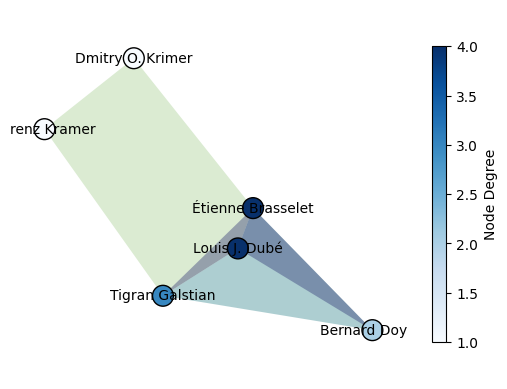

In [17]:
def plot_H(H):
    pos = xgi.barycenter_spring_layout(H, seed=42)  # fix position
    ax, collections = xgi.draw(H, pos=pos, node_labels=True, node_size=15, node_fc=H.nodes.degree(), node_fc_cmap="Blues")

    (node_collection, _, _) = collections

    # print({H.nodes.degree().asdict()})
    
    max_key = max(H.nodes.degree().asdict(), key=H.nodes.degree().asdict().get)
    print(f"Highest degree: {max_key}") # highest degree node 
    plt.colorbar(node_collection, label="Node Degree", shrink=0.8)

plot_H(H)

Highest degree 2004: Étienne Brasselet
Highest degree 2005: Dmitry O. Krimer
Highest degree 2006: Étienne Brasselet
Highest degree 2008: Jean-François Laprise
Highest degree 2009: Pierre-André Noël
Highest degree 2010: Louis J. Dubé
Highest degree 2011: Vincent Marceau
Highest degree 2012: Louis J. Dubé
Highest degree 2013: Louis J. Dubé
Highest degree 2014: Louis J. Dubé
Highest degree 2015: Louis J. Dubé
Highest degree 2016: Louis J. Dubé
Highest degree 2017: Louis J. Dubé
Highest degree 2018: Louis J. Dubé
Highest degree 2019: Louis J. Dubé
Highest degree 2020: Vincent Thibeault


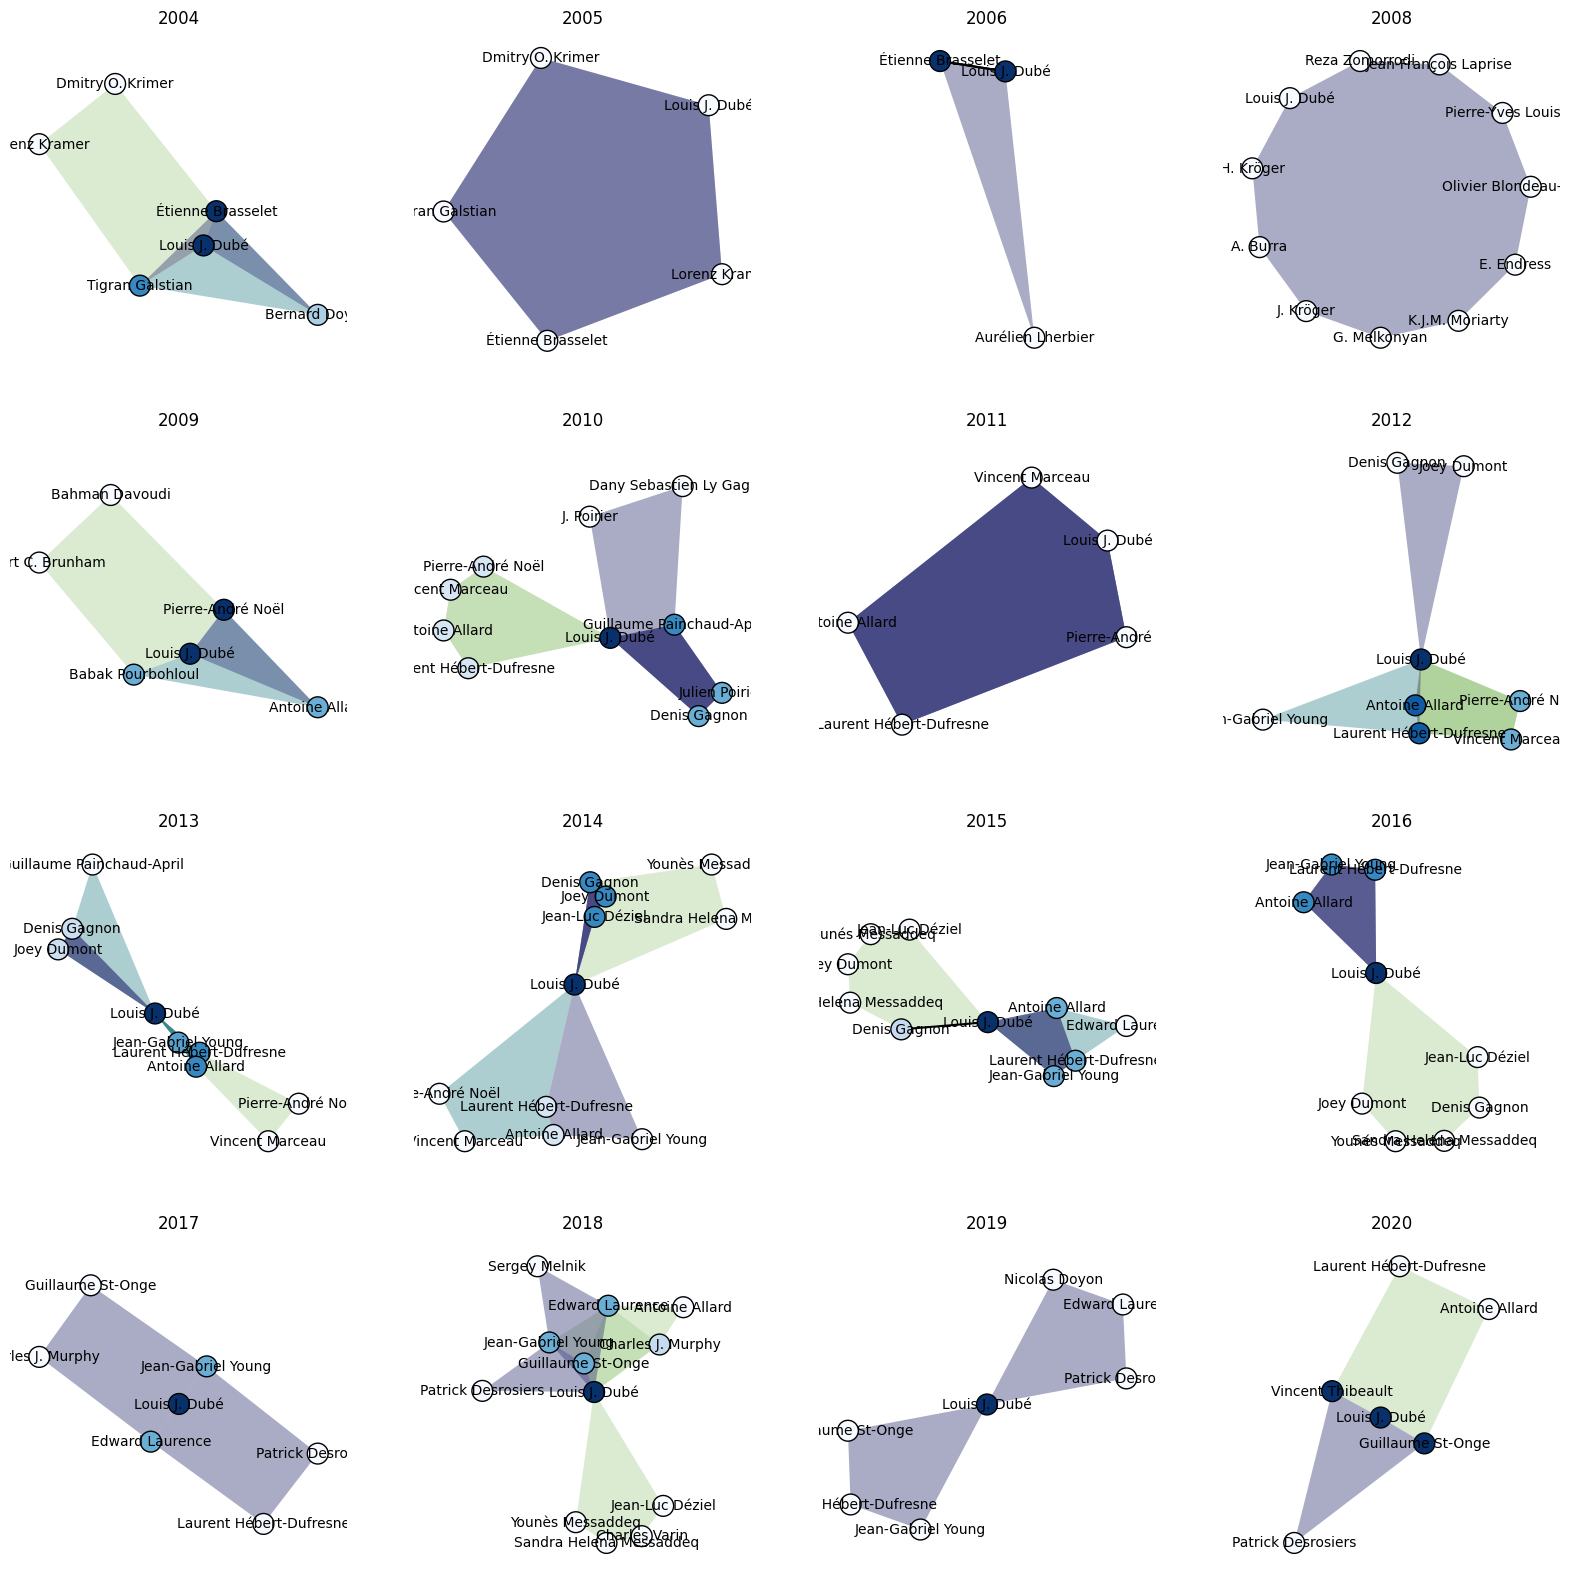

In [21]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for fname,ax in zip(PI_fnames[23:42], axes.flatten()):
    work = read_jsonl(fname)
    hyperedge_list = [extract_coauthor(w) for w in work]
    
    H = xgi.Hypergraph(hyperedge_list)
    
    pos = xgi.barycenter_spring_layout(H, seed=42)  # fix position
    _, collections = xgi.draw(H, ax=ax, pos=pos, node_labels=True, node_size=15, node_fc=H.nodes.degree(), node_fc_cmap="Blues")

    (node_collection, _, _) = collections
    
    max_key = max(H.nodes.degree().asdict(), key=H.nodes.degree().asdict().get)
    yr=fname.stem.split('_')[-1]
    ax.set_title(f"{yr}")
    print(f"Highest degree {yr}: {max_key}") # highest degree node 